#Tugas 4 PDIB
##Amira Husna Nur Adilah
##2006531825

Catatan: Untuk cell yang prosesnya menggunakan Geopandas dan Nominatim akan memakan waktu run selama 15 hingga 30 menit mengingat jumlah data yang cukup banyak.

In [3]:
# import libraries needed
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 16.7 MB 45.2 MB/s 
     |████████████████████████████████| 6.3 MB 40.9 MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [5]:
# import data
df = pd.read_csv('drive/MyDrive/Coolyeah/PDIB/Tugas 4/dataset_harga_rumah.csv', low_memory = False)

In [6]:
# menampilkan 5 baris pertama dataset
df.head()

,diposting_oleh,sedang_pembangunan,disetujui_pemerintah,total_ruangan,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat,longitude,latitude,harga
0,Owner,0.0,0,2.0,tipe_a,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0.0,0,2.0,tipe_a,1275.0,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0.0,0,2.0,tipe_a,933.1597222,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0.0,1,2.0,tipe_a,929.9211427,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1.0,0,2.0,tipe_a,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [7]:
# menampilkan 5 baris terakhir dataset
df.tail()

,diposting_oleh,sedang_pembangunan,disetujui_pemerintah,total_ruangan,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat,longitude,latitude,harga
29446,Owner,0.0,0,3.0,tipe_a,2500.0,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0.0,0,2.0,tipe_a,769.2307692,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0.0,0,2.0,tipe_a,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0.0,0,2.0,tipe_a,927.0790093,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0.0,1,2.0,tipe_a,896.7741935,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


In [8]:
# menampilkan dimensi data
df.shape

(29451, 12)

In [9]:
# menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diposting_oleh        29451 non-null  object 
 1   sedang_pembangunan    27476 non-null  float64
 2   disetujui_pemerintah  29451 non-null  int64  
 3   total_ruangan         28071 non-null  float64
 4   tipe_a_atau_b         29451 non-null  object 
 5   kaki_persegi          27765 non-null  object 
 6   siap_pindah           29451 non-null  object 
 7   dijual_kembali        29451 non-null  object 
 8   alamat                27436 non-null  object 
 9   longitude             29451 non-null  float64
 10  latitude              26008 non-null  float64
 11  harga                 29451 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.7+ MB


In [10]:
# menampilkan statistika deskriptif data (numerik)
df.describe()

,sedang_pembangunan,disetujui_pemerintah,total_ruangan,longitude,latitude,harga
count,27476.000000,29451.000000,28071.000000,29451.000000,26008.000000,29451.000000
mean,0.179684,0.317918,2.392220,21.300255,76.820157,142.898746
std,0.383931,0.465675,0.882229,6.205306,10.697823,656.880713
min,0.000000,0.000000,1.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,20.750000,77.326330,62.000000
75%,0.000000,1.000000,3.000000,26.900926,77.943705,100.000000
max,1.000000,1.000000,20.000000,59.912884,152.962676,30000.000000


In [11]:
# menampilkan statistika deskriptif data (object)
df.describe(include='object')

,diposting_oleh,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat
count,29451,29451,27765,29451,29451,27436
unique,3,2,18115,9,5,6648
top,Dealer,tipe_a,1000.0,1,1,"Zirakpur,Chandigarh"
freq,18291,29427,446,21363,23610,473


In [12]:
# Mengecek nilai unik dari setiap kolom
for col in df.columns:
  print(col+" unique")
  print(df[col].unique())
  print()

diposting_oleh unique
['Owner' 'Dealer' 'Builder']

sedang_pembangunan unique
[ 0.  1. nan]

disetujui_pemerintah unique
[0 1]

total_ruangan unique
[ 2.  3.  1.  4.  5.  6. nan 12.  8. 20. 10.  7.  9. 13. 17. 15. 11.]

tipe_a_atau_b unique
['tipe_a' 'tipe_b']

kaki_persegi unique
['1300.236407' '1275.0' '933.1597222' ... '1022.641509' '927.0790093'
 '896.7741935']

siap_pindah unique
['1' '0' 'testes' 'a' 'awa' '1-1-1-' 'benar' 'salah' 'asik']

dijual_kembali unique
['1' '0' 'Aku paling benar' 'SALAH' 'Semangat Dek']

alamat unique
['Ksfc Layout,Bangalore' 'Vishweshwara Nagar,Mysore' 'Jigani,Bangalore'
 ... 'west mambalam,Chennai' 'Gandhi Nagar,Gulbarga'
 'E3-108, Lake View Recidency,,Vapi']

longitude unique
[12.96991  12.274538 12.778033 ... 18.9737   17.357159 39.945409]

latitude unique
[ 77.59796   76.644605  77.632191 ...  73.3321    76.841908 -86.150721]

harga unique
[  55.    51.    43.  ... 1170.  8660.    18.3]



In [13]:
# Menukar nama kolom longitude dan latitude
df['temp'] = df['longitude']
df['longitude'] = df['latitude']
df['latitude'] = df['temp']
df.describe()

,sedang_pembangunan,disetujui_pemerintah,total_ruangan,longitude,latitude,harga,temp
count,27476.000000,29451.000000,28071.000000,26008.000000,29451.000000,29451.000000,29451.000000
mean,0.179684,0.317918,2.392220,76.820157,21.300255,142.898746,21.300255
std,0.383931,0.465675,0.882229,10.697823,6.205306,656.880713,6.205306
min,0.000000,0.000000,1.000000,-121.761248,-37.713008,0.250000,-37.713008
25%,0.000000,0.000000,2.000000,73.798100,18.452663,38.000000,18.452663
50%,0.000000,0.000000,2.000000,77.326330,20.750000,62.000000,20.750000
75%,0.000000,1.000000,3.000000,77.943705,26.900926,100.000000,26.900926
max,1.000000,1.000000,20.000000,152.962676,59.912884,30000.000000,59.912884


In [14]:
# mengecek nilai tidak sesuai pada kolom kaki_persegi
kaki_persegi_str = df[df['kaki_persegi'].astype(str).str.contains('[a-zA-Z]')]["kaki_persegi"]
print(kaki_persegi_str.unique())

[nan 'salah' 'awa' 'benar' 'asik' 'testes' 'a']


In [15]:
# mengecek nilai tidak sesuai pada kolom kaki_persegi
kaki_persegi_1 = df[df['kaki_persegi'].astype(str).str.contains('1-1-')]["kaki_persegi"]
print(kaki_persegi_1.unique())

['1-1-1-']


In [16]:
# Check outlier data for kaki_persegi
kpm = df[df["kaki_persegi"].notnull()]['kaki_persegi']
kpm = pd.DataFrame(df[~df['kaki_persegi'].astype(str).str.contains('[a-zA-Z]')]["kaki_persegi"])
kpm = pd.DataFrame(kpm[~kpm['kaki_persegi'].astype(str).str.contains('1-1-')]["kaki_persegi"])
kpm = pd.DataFrame(kpm[kpm.notnull()]["kaki_persegi"]).astype(float)

Q1 = kpm.quantile(0.25)
Q3 = kpm.quantile(0.75)
IQR = Q3 - Q1
jumlah_outlier = kpm[((kpm < (Q1 - 1.5 * IQR)) |(kpm > (Q3 + 1.5 * IQR))).any(axis=1)].count()
print(jumlah_outlier)

kaki_persegi    1491
dtype: int64


In [17]:
# Melakukan validasi data
df.loc[~df['siap_pindah'].isin(['0','1']), 'siap_pindah'] = df['siap_pindah'].mode()[0]
df.loc[~df['dijual_kembali'].isin(['0','1']), 'dijual_kembali'] = df['dijual_kembali'].mode()[0]
kpm_median = kpm['kaki_persegi'].median()
df.replace({'kaki_persegi': {"testes": kpm_median, 'a': kpm_median, 'awa':kpm_median, '1-1-1-':kpm_median, 'benar':kpm_median, 'salah':kpm_median, 'asik':kpm_median}}, inplace=True)

In [18]:
df.describe(include="object")

,diposting_oleh,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat
count,29451,29451,27765.000000,29451,29451,27436
unique,3,2,18109.000000,2,2,6648
top,Dealer,tipe_a,1176.470588,1,1,"Zirakpur,Chandigarh"
freq,18291,29427,1001.000000,24741,27649,473


In [19]:
# mengecek null values
df.isnull().sum(axis = 0)

diposting_oleh             0
sedang_pembangunan      1975
disetujui_pemerintah       0
total_ruangan           1380
tipe_a_atau_b              0
kaki_persegi            1686
siap_pindah                0
dijual_kembali             0
alamat                  2015
longitude               3443
latitude                   0
harga                      0
temp                       0
dtype: int64

In [20]:
# Menghitung Outlier
for col in ['total_ruangan', 'kaki_persegi']:
  a = pd.DataFrame(df[df[col].notnull()][col].astype(float))
  Q1 = a[col].quantile(0.25)
  Q3 = a[col].quantile(0.75)
  IQR = Q3 - Q1
  jumlah_outlier = a[((a[col] < (Q1 - 1.5 * IQR)) |(a[col] > (Q3 + 1.5 * IQR)))][col].count()
  print("jumlah outlier kolom "+col+": "+str(jumlah_outlier))

jumlah outlier kolom total_ruangan: 271
jumlah outlier kolom kaki_persegi: 1626


In [21]:
#menghitung mean untuk nilai pada kolom kaki_persegi dan total_ruangan yang tidak bernilai null
median_kaki_persegi = df["kaki_persegi"].astype(float).median()

median_total_ruangan = round(df["total_ruangan"][df['total_ruangan'].notnull()].astype(int).median())

In [22]:
# Me-replace null value dengan modus untuk data kategorik dan median atau mean untuk data continue
df['sedang_pembangunan'].fillna(df['sedang_pembangunan'].mode()[0], inplace = True)
df['total_ruangan'].fillna(median_total_ruangan, inplace = True)
df['kaki_persegi'].fillna(median_kaki_persegi, inplace = True)

In [23]:
alamat_null = pd.DataFrame(df[(df['alamat'].isnull()) & (~df['longitude'].isnull()) & (~df['latitude'].isnull())])

In [24]:
# mereplace null values untuk kolom alamat
locator = Nominatim(user_agent='myGeocoder')
for i in alamat_null.index:
      coordinates = str(df['latitude'][i])+','+str(df['longitude'][i])
      location = locator.reverse(coordinates)
      df['alamat'][i] = location.address
df.isnull().sum(axis = 0)

diposting_oleh             0
sedang_pembangunan         0
disetujui_pemerintah       0
total_ruangan              0
tipe_a_atau_b              0
kaki_persegi               0
siap_pindah                0
dijual_kembali             0
alamat                   229
longitude               3443
latitude                   0
harga                      0
temp                       0
dtype: int64

In [25]:
longitude_null = pd.DataFrame(df[(~df['alamat'].isnull()) & (df['longitude'].isnull()) & (~df['latitude'].isnull())])

In [26]:
# mereplace null values untuk kolom longitude
locator = Nominatim(user_agent='myGeocoder')
for i in longitude_null.index:
   if (df['alamat'][i] != df['alamat'][1638]) and (df['alamat'][i] != df['alamat'][2991]) and (df['alamat'][i] != df['alamat'][7454]) and (df['alamat'][i] != df['alamat'][10506]) and (df['alamat'][i] != df['alamat'][23042]):
      location = locator.geocode(df['alamat'][i])
      if location != None:
        df['longitude'][i] = location.longitude
df.isnull().sum(axis = 0)

diposting_oleh             0
sedang_pembangunan         0
disetujui_pemerintah       0
total_ruangan              0
tipe_a_atau_b              0
kaki_persegi               0
siap_pindah                0
dijual_kembali             0
alamat                   229
longitude               1232
latitude                   0
harga                      0
temp                       0
dtype: int64

In [27]:
# drop sisa null values
df.dropna(inplace=True)
df.isnull().sum(axis = 0)

diposting_oleh          0
sedang_pembangunan      0
disetujui_pemerintah    0
total_ruangan           0
tipe_a_atau_b           0
kaki_persegi            0
siap_pindah             0
dijual_kembali          0
alamat                  0
longitude               0
latitude                0
harga                   0
temp                    0
dtype: int64

In [28]:
# Mengubah tipe data untuk setiap kolom yang tidak sesuai
df["sedang_pembangunan"] = df["sedang_pembangunan"].astype(int)
df["total_ruangan"] = df["total_ruangan"].astype(int)
df["siap_pindah"] = df["siap_pindah"].astype(int)
df["dijual_kembali"] = df["dijual_kembali"].astype(int)
df["kaki_persegi"] = df["kaki_persegi"].astype(float)

In [29]:
# Mengecek data setelah dilakukan konversi tipe data
print(df.dtypes)

diposting_oleh           object
sedang_pembangunan        int64
disetujui_pemerintah      int64
total_ruangan             int64
tipe_a_atau_b            object
kaki_persegi            float64
siap_pindah               int64
dijual_kembali            int64
alamat                   object
longitude               float64
latitude                float64
harga                   float64
temp                    float64
dtype: object


In [30]:
# Melakukan encoding untuk kolom tipe_a_atau_b dan kolom diposting_oleh
label_encoder = preprocessing.LabelEncoder()

df['tipe_a_atau_b'] = label_encoder.fit_transform(df['tipe_a_atau_b'])

df['diposting_oleh'] = label_encoder.fit_transform(df['diposting_oleh'])

In [31]:
df.head()

,diposting_oleh,sedang_pembangunan,disetujui_pemerintah,total_ruangan,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat,longitude,latitude,harga,temp
0,2,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",77.597960,12.969910,55.0,12.969910
1,1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",76.644605,12.274538,51.0,12.274538
2,2,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",77.632191,12.778033,43.0,12.778033
3,2,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",77.344500,28.642300,62.5,28.642300
4,1,1,0,2,0,999.009247,0,1,"New Town,Kolkata",88.484911,22.592200,60.5,22.592200


In [32]:
# mengecek data duplikat
df.duplicated().sum()

232

In [33]:
# menghapus data duplikat
df.drop_duplicates(inplace=True)

In [34]:
# mengecek kembali data duplikat setelah dihapus
df.duplicated().sum()

0

In [35]:
# Check outlier data for numeric values
for i in ['kaki_persegi', 'harga', 'total_ruangan','longitude', 'latitude']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  print("IQR "+i+": "+str(IQR))

IQR kaki_persegi: 558.4943878500001
IQR harga: 62.0
IQR total_ruangan: 1.0
IQR longitude: 3.9722309999999936
IQR latitude: 8.463072999999998


In [36]:
# Clear outlier data from dataset
for i in ['kaki_persegi', 'harga', 'total_ruangan', 'longitude', 'latitude']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((df[i] < (Q1 - 1.5 * IQR)) |(df[i] > (Q3 + 1.5 * IQR)))]

In [37]:
df.shape

(21558, 13)

In [38]:
#Kategorisasi Harga
def categorizing_data_harga(cell):
    if cell > 150:
        return ">150"
    elif cell >= 100:
        return "100-150"
    elif cell >= 50:
        return "50-100"
    else:
        return "<50"

df['kategori_harga'] = df.apply(lambda cell: categorizing_data_harga(cell.harga), axis=1)

In [39]:
#Kategorisasi Luas
def categorizing_data_luas(cell):
    if cell > 2000:
        return ">2000"
    elif cell >= 1500:
        return "1500-2000"
    elif cell >= 1000:
        return "1000-1500"
    elif cell >= 500:
        return "500-1000"
    else:
        return "<500"

df['kategori_luas'] = df.apply(lambda cell: categorizing_data_luas(cell.kaki_persegi), axis=1)

In [40]:
df.head()

,diposting_oleh,sedang_pembangunan,disetujui_pemerintah,total_ruangan,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat,longitude,latitude,harga,temp,kategori_harga,kategori_luas
0,2,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",77.597960,12.969910,55.0,12.969910,50-100,1000-1500
1,1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",76.644605,12.274538,51.0,12.274538,50-100,1000-1500
2,2,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",77.632191,12.778033,43.0,12.778033,<50,500-1000
3,2,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",77.344500,28.642300,62.5,28.642300,50-100,500-1000
5,2,0,0,3,0,1250.000000,1,1,"South Chittoor,Kochi",76.282571,10.033280,42.0,10.033280,<50,1000-1500


In [41]:
# Menghapus kolom tidak perlu
df.drop(columns="temp", inplace=True)

In [42]:
# get view of data after cleansing
df.head()

,diposting_oleh,sedang_pembangunan,disetujui_pemerintah,total_ruangan,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat,longitude,latitude,harga,kategori_harga,kategori_luas
0,2,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",77.597960,12.969910,55.0,50-100,1000-1500
1,1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",76.644605,12.274538,51.0,50-100,1000-1500
2,2,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",77.632191,12.778033,43.0,<50,500-1000
3,2,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",77.344500,28.642300,62.5,50-100,500-1000
5,2,0,0,3,0,1250.000000,1,1,"South Chittoor,Kochi",76.282571,10.033280,42.0,<50,1000-1500


<function matplotlib.pyplot.show(*args, **kw)>

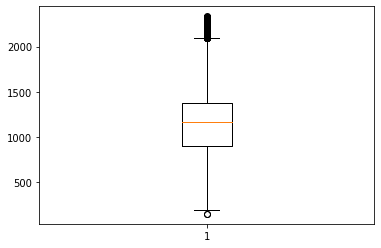

In [43]:
# visualisasi outlier kolom kaki_persegi
fig = plt.figure()
plt.boxplot(df['kaki_persegi'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

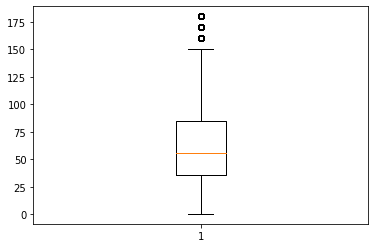

In [44]:
# visualisasi outlier kolom harga
fig = plt.figure()
plt.boxplot(df['harga'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

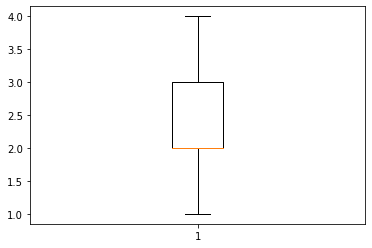

In [45]:
# visualisasi outlier kolom total_ruangan
fig = plt.figure()
plt.boxplot(df['total_ruangan'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

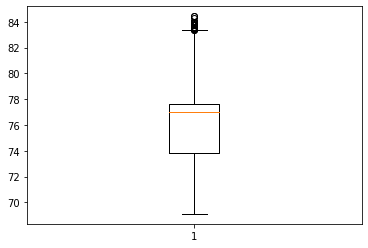

In [46]:
# visualisasi outlier kolom longitude
fig = plt.figure()
plt.boxplot(df['longitude'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

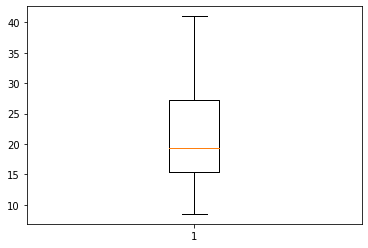

In [47]:
# visualisasi outlier kolom latitude
fig = plt.figure()
plt.boxplot(df['latitude'])
plt.show

In [48]:
# download cleaned data
from google.colab import files
df.to_csv('Tugas4_2006531825_AmiraHusnaNurAdilah.csv', index = None, header = True)
files.download('Tugas4_2006531825_AmiraHusnaNurAdilah.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>